# An introduction to Polars Module

The main **core** of this notebook is to get a general introduction to the [Polars](https://pola.rs) module.

I am going to use the [Iris](https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html) (A.K.A) Fisher's Iris data set, which is a dataset that stores petal and sepal length for a 3 different types of irises (Setosa, Versicolour and Virginica). Each row represents a flower. You can see all about this dataset [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- The dataset consists of 50 samples from each of three species of Iris.
- The dataset contains a set of 150 records under five attributes: sepal length, sepal width, petal length, petal width and species.

<table style="width: 100%; text-align: center;">
  <tr>
    <td>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1280px-Iris_versicolor_3.jpg" width="500">
      <p><strong>Versicolor</strong></p>
    </td>
    <td>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="400">
      <p><strong>Setosa</strong></p>
    </td>
    <td>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1280px-Iris_virginica.jpg" width="500">
      <p><strong>Virginia</strong></p>
    </td>
  </tr>
</table>



In [2]:
# Load modules
import polars as pl
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data
iris = load_iris()

# Loading data and adding columns

Polars shares similarities with pandas, but in some things it is different. If you want to declare a DataFrame you have to use the [DataFrame](https://docs.pola.rs/api/python/stable/reference/dataframe/index.html) object. It has a lot of pararameters, but some of the most useful are *data* and *schema*. The first one is the data you want to use and the second one is the "structure" of your data.

Of course, Polars has some methods in order to read data like csv, parquet, excel, etc. You can see all the information [here](https://docs.pola.rs/api/python/stable/reference/io.html).

## Expressions and Contexts
* *Expressions*: They are one of the main strengths of Polars because they provide a modular and flexible way of expressing data transformations.
* *Contexts*: Polars expressions need a context in which they are executed to produce a result. Depending on the context it is used in, the same Polars expression can produce different results, the most popular contexts are:
    1. [select](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.select.html): It selects columns from a dataframe.
    2. [with_columns](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.with_columns.html): It adds columns to a dataframe.
    3. [filter](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.filter.html): Filter rows, retaining those that match the given predicate expression(s).
    4. [groupby](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.group_by.html) Column(s) to group by. Accepts expression input. Strings are parsed as column names.

There are other contexts like [clone](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.clone.html#polars.DataFrame.clone), [drop](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.drop.html#polars.DataFrame.drop), etc. You can see all the details [here](https://docs.pola.rs/api/python/stable/reference/dataframe/modify_select.html)

## with_columns

In [14]:
# Polars Dataframe 
head = 5
df_polars = pl.DataFrame(data = iris.data, schema = iris.feature_names)

# the iris.target has the species of each record. Therefore, we can use the with_columns context in order to add the column to the dataframe.
df_polars = df_polars.with_columns(pl.Series(iris.target).alias('species'))

# I'd like to calculate the petal ratio, which is the petal legth divide by the width, in order to do this we can use the "expressions". My expression is:
expression = pl.col('petal length (cm)') / pl.col('petal width (cm)')
df_polars = df_polars.with_columns( petal_ratio = expression)

# Print general information about our dataframe
print(f'DataFrame Shape: {df_polars.shape}')
print(f'Head {head} of our dataframe')
print(df_polars.head(head))
print('You can use the method .describe() in order to get a summary data about your dataframe')
print(df_polars.describe())


DataFrame Shape: (150, 6)
Head 5 of our dataframe
shape: (5, 6)
┌──────────────┬───────────────────┬───────────────────┬───────────────────┬─────────┬─────────────┐
│ sepal length ┆ sepal width (cm)  ┆ petal length (cm) ┆ petal width (cm)  ┆ species ┆ petal_ratio │
│ (cm)         ┆ ---               ┆ ---               ┆ ---               ┆ ---     ┆ ---         │
│ ---          ┆ f64               ┆ f64               ┆ f64               ┆ i64     ┆ f64         │
│ f64          ┆                   ┆                   ┆                   ┆         ┆             │
╞══════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═════════╪═════════════╡
│ 5.1          ┆ 3.5               ┆ 1.4               ┆ 0.2               ┆ 0       ┆ 7.0         │
│ 4.9          ┆ 3.0               ┆ 1.4               ┆ 0.2               ┆ 0       ┆ 7.0         │
│ 4.7          ┆ 3.2               ┆ 1.3               ┆ 0.2               ┆ 0       ┆ 6.5         │
│ 4.6          ┆ 3.1       

I would like to build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) which produces a plot pairwise relationship in a dataset. However, currently polars does not integrate to seaborn. Hence, we will use the "pandas" dataframe.

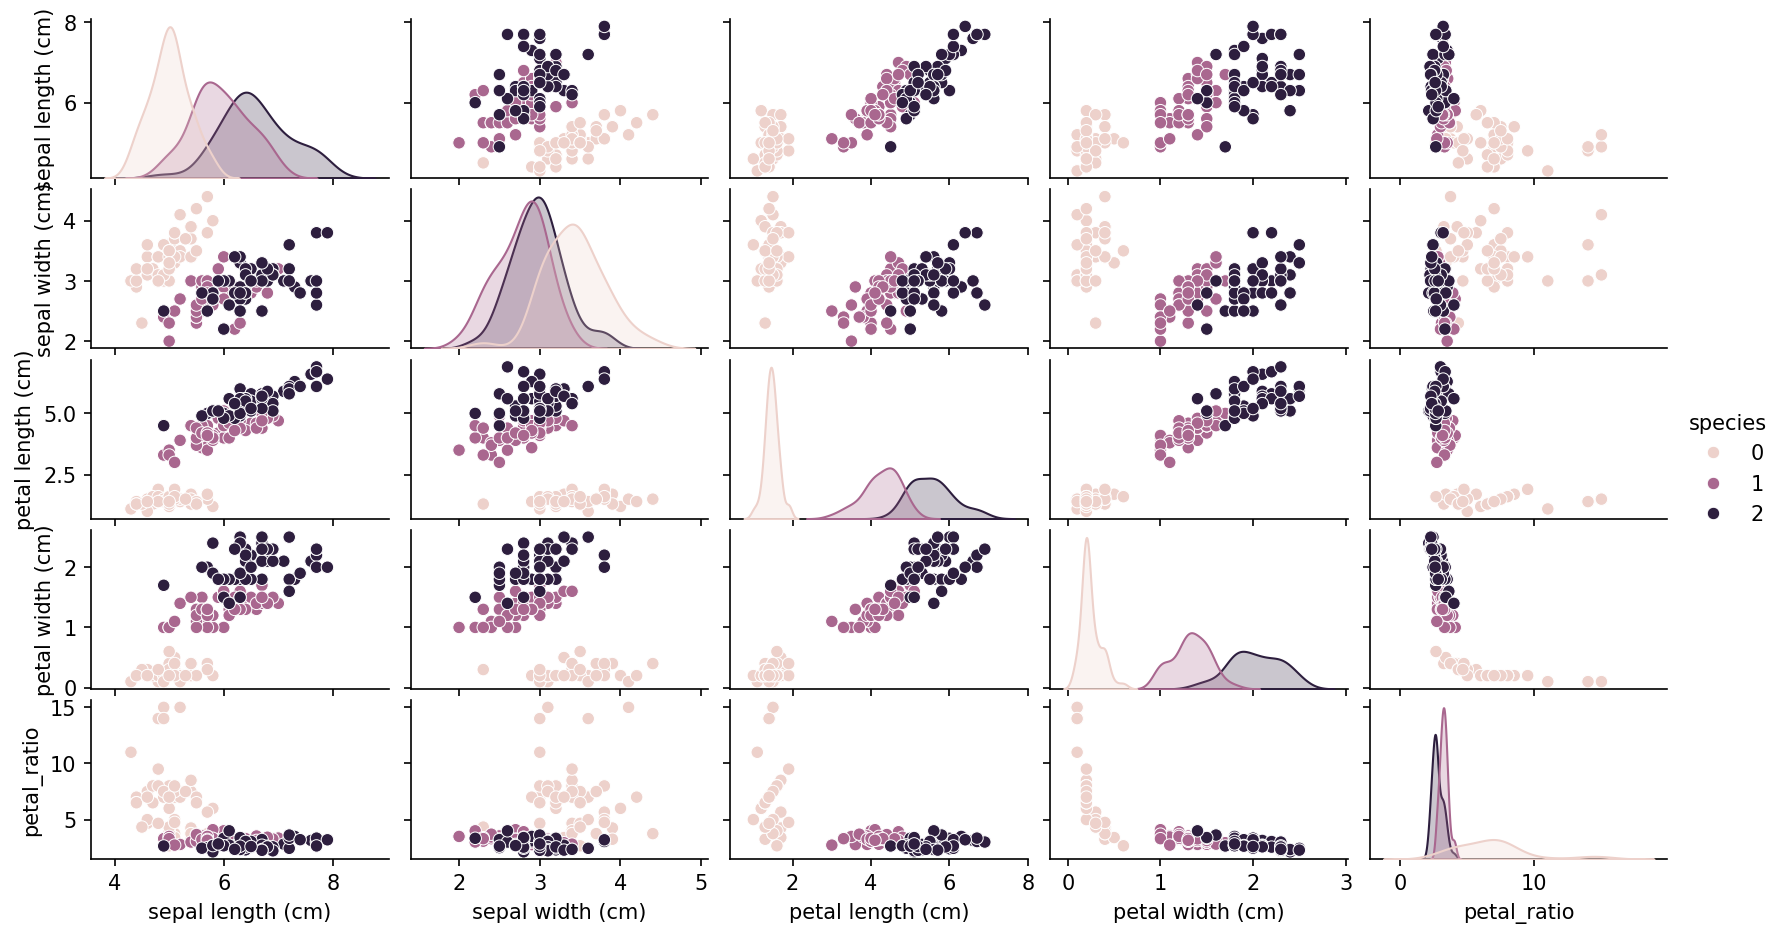

In [5]:
g = sns.pairplot(df_polars.to_pandas(), hue='species')
g.figure.set_size_inches(12, 6)
g.figure.set_dpi(150)  # Cambia el dpi
plt.show()

## Select & Filter

- Select allows you to select and manipulate columns from a dataframe.
- Filter allows us to create a second dataframe with a subset of the rows of the original one.

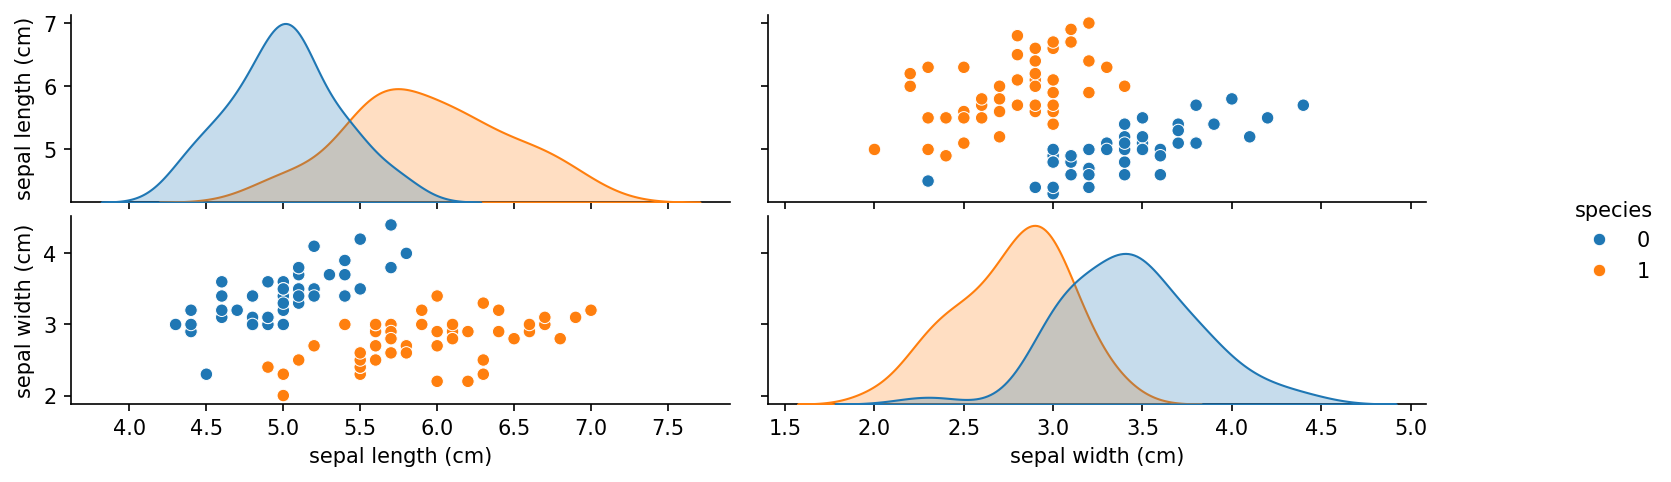

In [26]:
df_select_filter = (df_polars.select( 
    pl.col('sepal length (cm)'),
    pl.col('sepal width (cm)'),
    pl.col('species')
)
.filter(
    pl.col('species').is_in([0,1]) # We want only the categories 0 and 1
)
)

g = sns.pairplot(df_select_filter.to_pandas(), hue = 'species')
g.figure.set_size_inches(12, 3)
g.figure.set_dpi(150)  # Cambia el dpi
plt.show()

## Groupby
It can be used to group together the rows of the dataframe that share the same value across one or more expressions. 

In [42]:
result = (df_polars.group_by(
    pl.col("species"),
    maintain_order=True
)
.agg(
    pl.len().alias('sample_size'),
    pl.col('sepal length (cm)').mean().round(2).alias('avg_sepal_length_cm'),
    pl.col('sepal width (cm)').mean().round(2).alias('avg_sepal_width_cm'),
    pl.col('petal length (cm)').mean().round(2).alias('avg_petal_length_cm'),
    pl.col('petal width (cm)').mean().round(2).alias('avg_petal_width_cm')
    )
)
print(result)

shape: (3, 6)
┌─────────┬─────────────┬──────────────────┬──────────────────┬──────────────────┬─────────────────┐
│ species ┆ sample_size ┆ avg_sepal_length ┆ avg_sepal_width_ ┆ avg_petal_length ┆ avg_petal_width │
│ ---     ┆ ---         ┆ _cm              ┆ cm               ┆ _cm              ┆ _cm             │
│ i64     ┆ u32         ┆ ---              ┆ ---              ┆ ---              ┆ ---             │
│         ┆             ┆ f64              ┆ f64              ┆ f64              ┆ f64             │
╞═════════╪═════════════╪══════════════════╪══════════════════╪══════════════════╪═════════════════╡
│ 0       ┆ 50          ┆ 5.01             ┆ 3.43             ┆ 1.46             ┆ 0.25            │
│ 1       ┆ 50          ┆ 5.94             ┆ 2.77             ┆ 4.26             ┆ 1.33            │
│ 2       ┆ 50          ┆ 6.59             ┆ 2.97             ┆ 5.55             ┆ 2.03            │
└─────────┴─────────────┴──────────────────┴──────────────────┴──────────────